## Load Dataset

In [1]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')

In [2]:
training_text = pd.read_csv('data/training_text',sep = "\|\|", engine='python',
                           names = ['ID', 'TEXT'], skiprows = 1)
training_variants = pd.read_csv('data/training_variants')

In [3]:
training_text.shape,training_variants.shape

((3321, 2), (3321, 4))

In [4]:
print('No of points in data: ', training_text.shape[0])
print('No of features: ', training_text.shape[1])
print("Name of features: ", training_text.columns.values)

No of points in data:  3321
No of features:  2
Name of features:  ['ID' 'TEXT']


In [5]:
print('No of points in data: ',training_variants.shape[0])
print('No of features: ',training_variants.shape[1])
print("Name of features: ",training_variants.columns.values)

No of points in data:  3321
No of features:  4
Name of features:  ['ID' 'Gene' 'Variation' 'Class']


In [6]:
training_text.head()

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [7]:
training_variants.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


### Merge training_variants,training_text

In [8]:
df_data = pd.merge(training_variants,training_text, how = 'left')
df_data.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [9]:
df_data.shape

(3321, 5)

### Check Missing Value

In [10]:
df_data.isnull().sum()

ID           0
Gene         0
Variation    0
Class        0
TEXT         5
dtype: int64

- There is null values only in text column

In [11]:
df_data[df_data.isnull().any(1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


### Fix Missing Value

In [12]:
df_data.loc[df_data['TEXT'].isnull(), 'TEXT'] = df_data['Gene'] + ' ' + df_data['Variation']

In [13]:
print("No of null values in TEXT data are :" , df_data['TEXT'].isnull().sum())

No of null values in TEXT data are : 0


In [14]:
df_data[df_data['ID'] == 2755]

,ID,Gene,Variation,Class,TEXT
2755,2755,BRAF,G596C,7,BRAF G596C


## Test, Train and Cross Validation Split

In [15]:
from sklearn.model_selection import train_test_split
y_true = df_data['Class'].values
df_data.Gene = df_data.Gene.str.replace('\s+', '_')
df_data.vVariation = df_data.Variation.str.replace('\s+', '_')

In [16]:
df_data.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [17]:
x_train, test_df, y_train, y_test = train_test_split(df_data,y_true, stratify = y_true, test_size=0.2)
train_df, cv_df, y_train, y_cv = train_test_split(x_train,y_train, stratify =y_train, test_size=0.2)

In [18]:
print('No of data points in train data:', train_df.shape[0])
print('No of data points in test data:', test_df.shape[0])
print('No of data points in cross validation data:', cv_df.shape[0])

No of data points in train data: 2124
No of data points in test data: 665
No of data points in cross validation data: 532


In [19]:
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cross_validation_distribution = cv_df['Class'].value_counts().sort_index()

### train_class_distribution

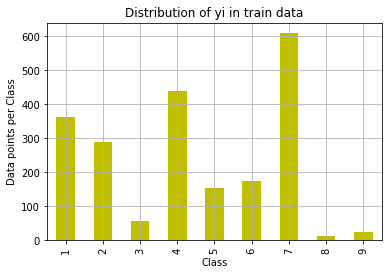

Number of data points in class 7 : 609
Number of data points in class 4 : 439
Number of data points in class 1 : 363
Number of data points in class 2 : 289
Number of data points in class 6 : 176
Number of data points in class 5 : 155
Number of data points in class 3 : 57
Number of data points in class 9 : 24
Number of data points in class 8 : 12


In [20]:
import matplotlib.pyplot as plt
import numpy as np
train_class_distribution.plot(kind='bar', color='y')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i] )

### test_class_distribution

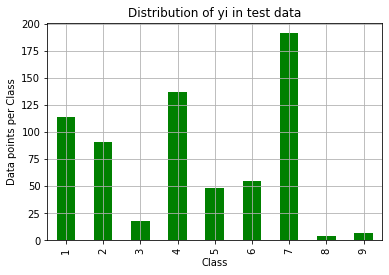

Number of data points in class 7 : 191
Number of data points in class 4 : 137
Number of data points in class 1 : 114
Number of data points in class 2 : 91
Number of data points in class 6 : 55
Number of data points in class 5 : 48
Number of data points in class 3 : 18
Number of data points in class 9 : 7
Number of data points in class 8 : 4


In [21]:
test_class_distribution.plot(kind='bar', color='g')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i] )

### cross_validation_distribution

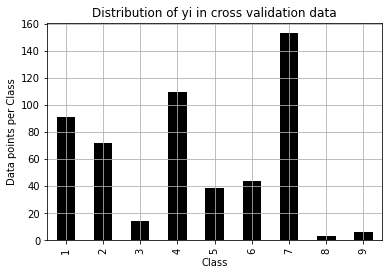

In [22]:
cross_validation_distribution.plot(kind='bar', color='k')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

### Preprocess Text Data

In [23]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         3321 non-null   int64 
 1   Gene       3321 non-null   object
 2   Variation  3321 non-null   object
 3   Class      3321 non-null   int64 
 4   TEXT       3321 non-null   object
dtypes: int64(2), object(3)
memory usage: 315.7+ KB


##  featurize Gene Column feature by BOW
Ans.there are two ways we can featurize this variable
1. One hot Encoding (BOW)
2. Response coding


We will choose the appropriate featurization based on the ML model we use. For this problem of multi-class classification with
categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack

In [25]:
unique_genes = train_df['Gene'].value_counts()
print("Number of unique values: ", unique_genes.shape[0])
print(unique_genes.head())

Number of unique values:  232
BRCA1    169
TP53     105
EGFR      95
PTEN      82
BRCA2     80
Name: Gene, dtype: int64


In [26]:
#BOW of gene feature 
gene_vectorizer = CountVectorizer()

train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [27]:
print("train_gene_feature_onehotCoding is converted feature using BOW. The shape of gene feature:", 
                                              train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using BOW. The shape of gene feature: (2124, 231)


##  featurize Variation Column feature by BOW

In [28]:
unique_genes = train_df['Variation'].value_counts()
print("Number of unique values: ", unique_genes.shape[0])
print(unique_genes.head())

Number of unique values:  1928
Truncating Mutations    62
Amplification           49
Deletion                44
Fusions                 20
Overexpression           4
Name: Variation, dtype: int64


In [29]:
#BOW of variation feature 
variation_vectorizer = CountVectorizer()

train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [30]:
print("train_variation_feature_onehotEncoded is converted feature using the BOW method. The shape :",
      train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the BOW method. The shape : (2124, 1961)


### Merge Variation And Gene Column in text,train and cv

In [31]:
train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

#### Now onwards we only process our text column

## Task: 1 featurize Text Column feature By BOW

In [32]:
text_vectorizer = CountVectorizer(min_df=3)

train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 57256


In [33]:
## Normalize Text Column
from sklearn.preprocessing import normalize
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

### Merging Gene,Variation And Text Column

In [34]:
train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))

In [35]:
print("BOW features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

BOW features :
(number of data points * number of features) in train data =  (2124, 59448)
(number of data points * number of features) in test data =  (665, 59448)
(number of data points * number of features) in cross validation data = (532, 59448)


## Model Build By Using BOW feaure

In [36]:
from sklearn.metrics import log_loss,confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.simplefilter('ignore')

In [37]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs',C=1)
clf.fit(train_x_onehotCoding, train_y)

LogisticRegression(C=1)

In [38]:
y_pred = clf.predict_proba(cv_x_onehotCoding)
print("Log loss - ",log_loss(cv_y,y_pred))

Log loss -  1.269047816287747


## Task 2: Using Tf-idf features In Text Column Instead Of BOW

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
text_vectorizer = TfidfVectorizer(min_df=3)
train_text_feature_tfidf = text_vectorizer.fit_transform(train_df['TEXT'])
train_text_features = text_vectorizer.get_feature_names()
train_text_fea_counts = train_text_feature_tfidf.sum(axis=0).A1
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))
print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 57256


In [40]:
# Normalizing text column
train_text_feature_tfidf = normalize(train_text_feature_tfidf, axis=0)
test_text_feature_tfidf = text_vectorizer.transform(test_df['TEXT'])
test_text_feature_tfidf = normalize(test_text_feature_tfidf, axis=0)
cv_text_feature_tfidf = text_vectorizer.transform(cv_df['TEXT'])
cv_text_feature_tfidf = normalize(cv_text_feature_tfidf, axis=0)

### Merging Gene,Variation And Text Column

In [41]:
train_x_tfidf = hstack((train_gene_var_onehotCoding, train_text_feature_tfidf)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_tfidf = hstack((test_gene_var_onehotCoding, test_text_feature_tfidf)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_tfidf = hstack((cv_gene_var_onehotCoding, cv_text_feature_tfidf)).tocsr()
cv_y = np.array(list(cv_df['Class']))

In [42]:
# Checking total datapoints in Train, Test and CV
print("(number of data points * number of features) in train data = ", train_x_tfidf.shape)
print("(number of data points * number of features) in test data = ", test_x_tfidf.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_tfidf.shape)

(number of data points * number of features) in train data =  (2124, 59448)
(number of data points * number of features) in test data =  (665, 59448)
(number of data points * number of features) in cross validation data = (532, 59448)


## Model Build By Using TFIDF feaure

In [43]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs',C=1)
clf.fit(train_x_tfidf, train_y)

LogisticRegression(C=1)

In [44]:
y_pred = clf.predict_proba(cv_x_tfidf)
print("Log loss - ",log_loss(cv_y,y_pred))

Log loss -  1.2157371904708925


## Task 3: Using only top 1000 fetures on Text column based on Tf-idf values

In [45]:
text_vectorizer = TfidfVectorizer(min_df=3, max_features = 1000)
train_text_feature_tfidf = text_vectorizer.fit_transform(train_df['TEXT'])
train_text_features = text_vectorizer.get_feature_names()
train_text_fea_counts = train_text_feature_tfidf.sum(axis=0).A1
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))
print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 1000


In [46]:
# Normalizing
train_text_feature_tfidf = normalize(train_text_feature_tfidf, axis=0)
test_text_feature_tfidf = text_vectorizer.transform(test_df['TEXT'])
test_text_feature_tfidf = normalize(test_text_feature_tfidf, axis=0)
cv_text_feature_tfidf = text_vectorizer.transform(cv_df['TEXT'])
cv_text_feature_tfidf = normalize(cv_text_feature_tfidf, axis=0)

### Merging Gene,Variation And Text Column

In [47]:
train_x_tfidf = hstack((train_gene_var_onehotCoding, train_text_feature_tfidf)).tocsr()
train_y = np.array(list(train_df['Class']))
test_x_tfidf = hstack((test_gene_var_onehotCoding, test_text_feature_tfidf)).tocsr()
test_y = np.array(list(test_df['Class']))
cv_x_tfidf = hstack((cv_gene_var_onehotCoding, cv_text_feature_tfidf)).tocsr()
cv_y = np.array(list(cv_df['Class']))

In [48]:
# Checking total datapoints in Train, Test and CV
print("(number of data points * number of features) in train data = ", train_x_tfidf.shape)
print("(number of data points * number of features) in test data = ", test_x_tfidf.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_tfidf.shape)

(number of data points * number of features) in train data =  (2124, 3192)
(number of data points * number of features) in test data =  (665, 3192)
(number of data points * number of features) in cross validation data = (532, 3192)


## Model Build

In [49]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs',C=1)
clf.fit(train_x_tfidf, train_y)

LogisticRegression(C=1)

In [50]:
y_pred = clf.predict_proba(cv_x_tfidf)
print("Log loss - ",log_loss(cv_y,y_pred))

Log loss -  0.9819489164127652


## Task 4: Applying LR with both uni-grams and bi-grams in Text Column only

In [51]:
text_vectorizer = CountVectorizer(min_df=3, ngram_range=(1, 2))
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
train_text_features= text_vectorizer.get_feature_names()
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))
print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 694222


In [52]:
# Normalizing
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

### Merging Gene,Variation And Text Column¶

In [53]:
train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))
test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))
cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))

In [54]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 696414)
(number of data points * number of features) in test data =  (665, 696414)
(number of data points * number of features) in cross validation data = (532, 696414)


## Model Build uni-grams and bi-grams

In [55]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs',C=1)
clf.fit(train_x_onehotCoding, train_y)

LogisticRegression(C=1)

In [56]:
y_pred = clf.predict_proba(cv_x_onehotCoding)
print("Log loss - ",log_loss(cv_y,y_pred))

Log loss -  1.8259125823098958


In [57]:
n_gram_bi_gram = log_loss(cv_y,y_pred)

### All Model Compare By Prettytable

In [58]:
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = ['Task_No.', 'Model Name', 'Featurize_Method', 'Test Log-Loss']

pt.add_row(["1","Logistic Regression", "BOW", "1.14"])
pt.add_row(["2","Logistic Regression", "TFIDF", "1.174"])
pt.add_row(["3","Logistic Regression", "TFIDF With 1000 feature", "0.968"])
pt.add_row(["4","Logistic Regression", "uni-grams and bi-grams", n_gram_bi_gram])

print(pt)

+----------+---------------------+-------------------------+--------------------+
| Task_No. |      Model Name     |     Featurize_Method    |   Test Log-Loss    |
+----------+---------------------+-------------------------+--------------------+
|    1     | Logistic Regression |           BOW           |        1.14        |
|    2     | Logistic Regression |          TFIDF          |       1.174        |
|    3     | Logistic Regression | TFIDF With 1000 feature |       0.968        |
|    4     | Logistic Regression |  uni-grams and bi-grams | 1.8259125823098958 |
+----------+---------------------+-------------------------+--------------------+
